In [1]:
# Importamos las librerías necesarias para nuestro código
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 13})

In [2]:
# Leemos el archivo "Leon.txt" con la siguiente función para empezar a trabajar.
df0 = pd.read_csv('Leon.txt', skiprows=20, sep='\s+',skipfooter=1,engine='python',names=('Fecha','Precip','Evap','Tmax','Tmin'))

In [3]:
# Imprimimos los primeros renglones de la tabla para asegurarnos de que se haya leído correctamente.
df0.head()

,Fecha,Precip,Evap,Tmax,Tmin
0,01/01/1961,0.0,3.7,25,9
1,02/01/1961,0.0,4.7,25.5,8.5
2,03/01/1961,0.0,5.4,25,6
3,04/01/1961,0.0,4,24,6
4,05/01/1961,0.0,2.8,24.5,6


In [4]:
df = pd.DataFrame(df0)

In [5]:
# Remplazamos la palabra "Nulo" del archivo de texto por "NaN" para que python pueda leerlo como dato nulo.
df = df.replace('Nulo','NaN')

In [6]:
# Cambiamos los tipos de datos para poder empezar a trabajar con ellos de manera correcta y para que python los reconozca.
# Además cambiamos el tipo de dato de la fecha para que lo reconozca como fecha.
df['Fecha'] = pd.to_datetime(df.apply(lambda x: x['Fecha'], 1), dayfirst=True)
df['Precip'] = df['Precip'].astype(float)
df['Evap'] = df['Evap'].astype(float)
df['Tmax'] = df['Tmax'].astype(float)
df['Tmin'] = df['Tmin'].astype(float)

In [60]:
df['Tsum'] = df.Tmin + df.Tmax

In [61]:
df['Tprom'] = df.Tsum / 2

In [62]:
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25


Text(0.5, 0, 'Días con heladas por año')

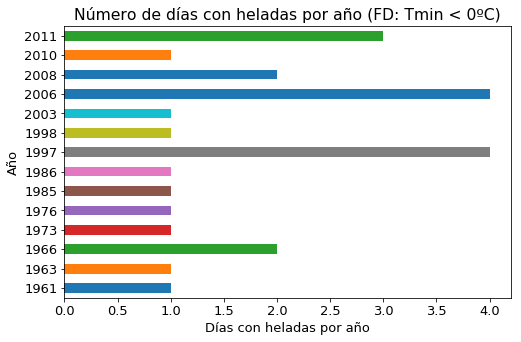

In [63]:
# Número de días con heladas por año (FD: Tmin < 0ºC)
fig = plt.figure(figsize=(8,5))
df_FD = df[df.Tmin < 0]
df_FD['Tmin'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'barh', legend = '')
plt.title('Número de días con heladas por año (FD: Tmin < 0ºC)')
plt.ylabel('Año')
plt.xlabel('Días con heladas por año')

Text(0.5, 0, 'Año')

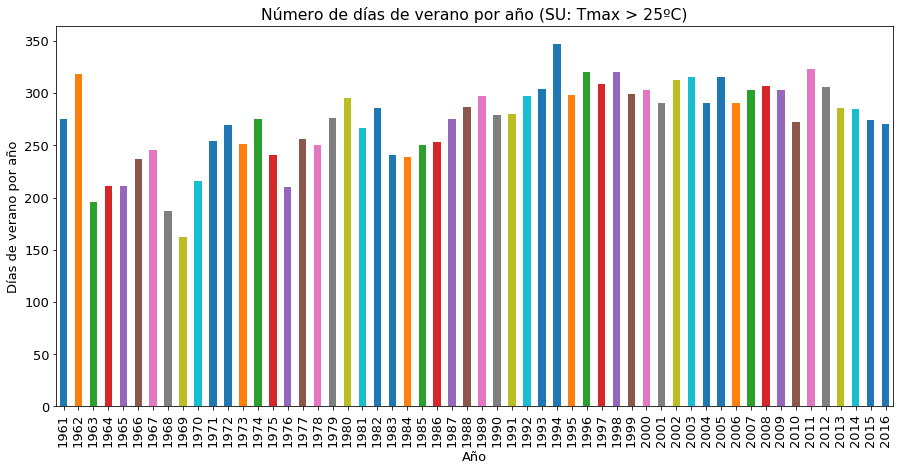

In [64]:
# Número de días de verano por año (SU: Tmax > 25ºC)

df_SU = df[df.Tmax > 25]

fig = plt.figure(figsize=(15,7))
df_SU['Tmax'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'bar', legend = '')
plt.title('Número de días de verano por año (SU: Tmax > 25ºC)')
plt.ylabel('Días de verano por año')
plt.xlabel('Año')

Text(0.5, 0, 'Noches Tropicales')

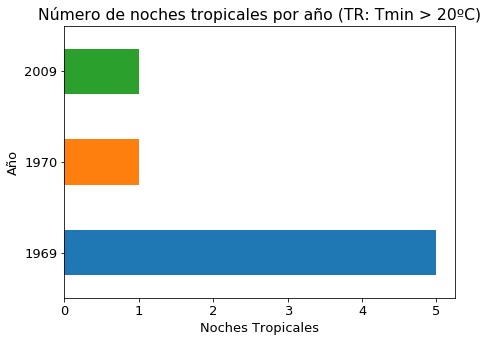

In [65]:
# Número de noches tropicales por año (TR: Tmin > 20ºC)

df_TR = df[df.Tmin > 20]

fig = plt.figure(figsize=(7,5))
df_TR['Tmin'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'barh', legend = '')
plt.title('Número de noches tropicales por año (TR: Tmin > 20ºC)')
plt.ylabel('Año')
plt.xlabel('Noches Tropicales')

In [66]:
# Primero creamos una columna nueva para tener los meses y días de cada año
df['Mes'] = df['Fecha'].dt.month
df['Día'] = df['Fecha'].dt.day
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom,Mes,Día
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00,1,1
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00,1,2
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50,1,3
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00,1,4
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25,1,5


In [67]:
# Seleccionamos los últimos 6 días del año
df_Dic = df[df.Mes >= 12]
df_LDays = df_Dic[df_Dic.Día >= 27]
df_GSLf = df_LDays[df_LDays.Tprom < 5]
df_GSLf['Tprom'].groupby([df.Fecha.dt.year, df.Mes]).agg('count')

Series([], Name: Tprom, dtype: int64)

Text(0.5, 0, 'Temperatura (°C)')

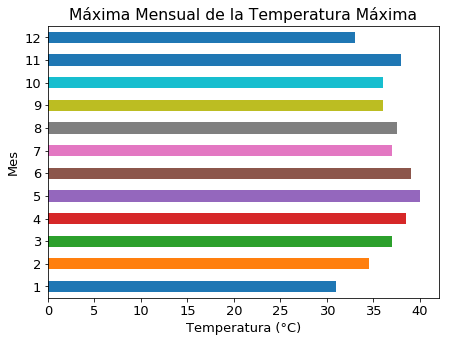

In [68]:
# TXx: La máxima mensual de la temperatura máxima, max(Tmax).

fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Tmax'].max().plot(kind = 'barh', legend = '')
plt.title('Máxima Mensual de la Temperatura Máxima')
plt.ylabel('Mes')
plt.xlabel('Temperatura (°C)')

Text(0.5, 0, 'Temperatura (°C)')

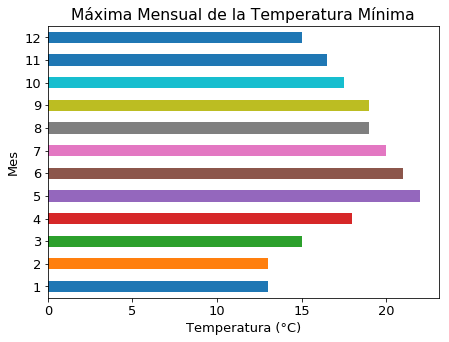

In [69]:
# TNx. La máxima mensual de la temperatura mínima, max(Tmin).

fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Tmin'].max().plot(kind = 'barh', legend = '')
plt.title('Máxima Mensual de la Temperatura Mínima')
plt.ylabel('Mes')
plt.xlabel('Temperatura (°C)')

Text(0.5, 0, 'Temperatura (°C)')

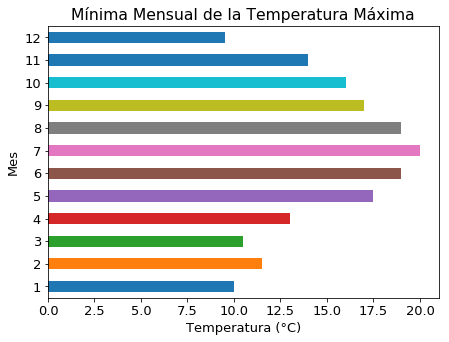

In [70]:
# TXn: El mínimo mensual de la temperatura máxima, min(Tmax). 
fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Tmax'].min().plot(kind = 'barh', legend = '')
plt.title('Mínima Mensual de la Temperatura Máxima')
plt.ylabel('Mes')
plt.xlabel('Temperatura (°C)')

Text(0.5, 0, 'Temperatura (°C)')

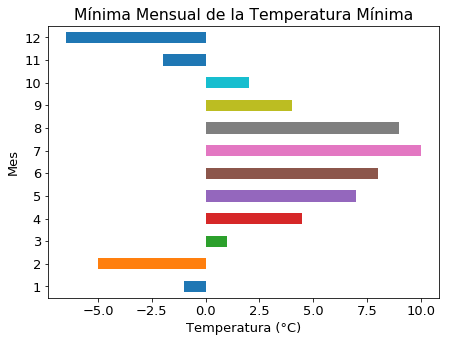

In [71]:
# TNn: El mínimo mensual de la temperatura mínima, min(Tmin).

fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Tmin'].min().plot(kind = 'barh', legend = '')
plt.title('Mínima Mensual de la Temperatura Mínima')
plt.ylabel('Mes')
plt.xlabel('Temperatura (°C)')

In [72]:
# DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 
df['Tdif'] = df.Tmax - df.Tmin

In [73]:
df.head()

,Fecha,Precip,Evap,Tmax,Tmin,Tsum,Tprom,Mes,Día,Tdif
0,1961-01-01,0.0,3.7,25.0,9.0,34.0,17.00,1,1,16.0
1,1961-01-02,0.0,4.7,25.5,8.5,34.0,17.00,1,2,17.0
2,1961-01-03,0.0,5.4,25.0,6.0,31.0,15.50,1,3,19.0
3,1961-01-04,0.0,4.0,24.0,6.0,30.0,15.00,1,4,18.0
4,1961-01-05,0.0,2.8,24.5,6.0,30.5,15.25,1,5,18.5


Text(0.5, 0, 'Temperatura (°C)')

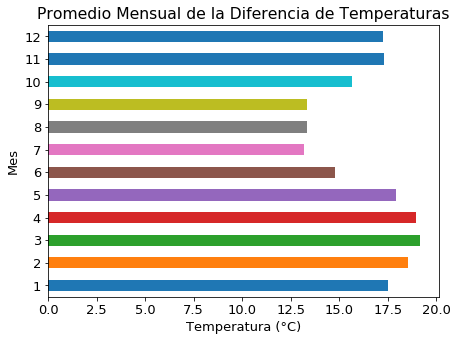

In [74]:
# DTR: El promedio mensual de la diferencia de temperaturas (Tmax-Tmin). 

fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Tdif'].mean().plot(kind = 'barh', legend = '')
plt.title('Promedio Mensual de la Diferencia de Temperaturas')
plt.ylabel('Mes')
plt.xlabel('Temperatura (°C)')

Text(0.5, 0, 'Precipitación (mm)')

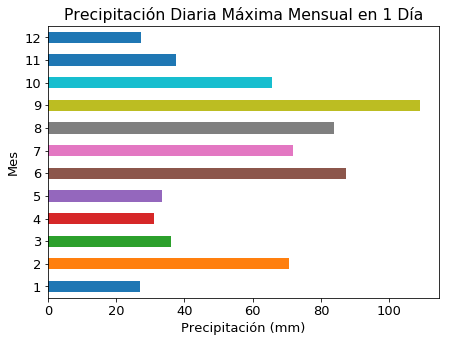

In [75]:
# Rx1day: Precipitación diaria máxima mensual en 1 día.
fig = plt.figure(figsize=(7,5))
df.groupby(df.Fecha.dt.month)['Precip'].max().plot(kind = 'barh', legend = '')
plt.title('Precipitación Diaria Máxima Mensual en 1 Día')
plt.ylabel('Mes')
plt.xlabel('Precipitación (mm)')

Text(0.5, 0, 'Año')

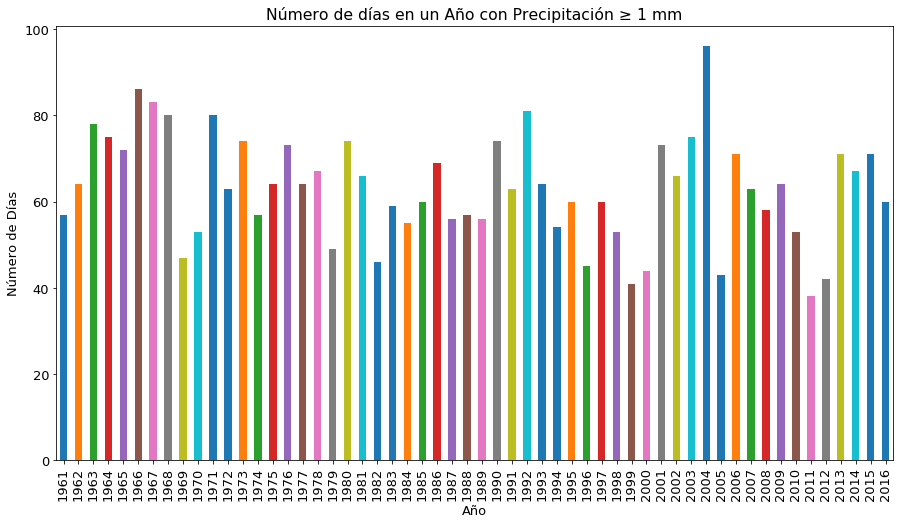

In [76]:
# Número de días en un año con precipitación mayor igual a 1mm
df_SDII = df[df.Precip >= 1]

fig = plt.figure(figsize=(15,8))
df_SDII['Precip'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'bar', legend = '')
plt.title('Número de días en un Año con Precipitación ≥ 1 mm')
plt.ylabel('Número de Días')
plt.xlabel('Año')

Text(0.5, 0, 'Año')

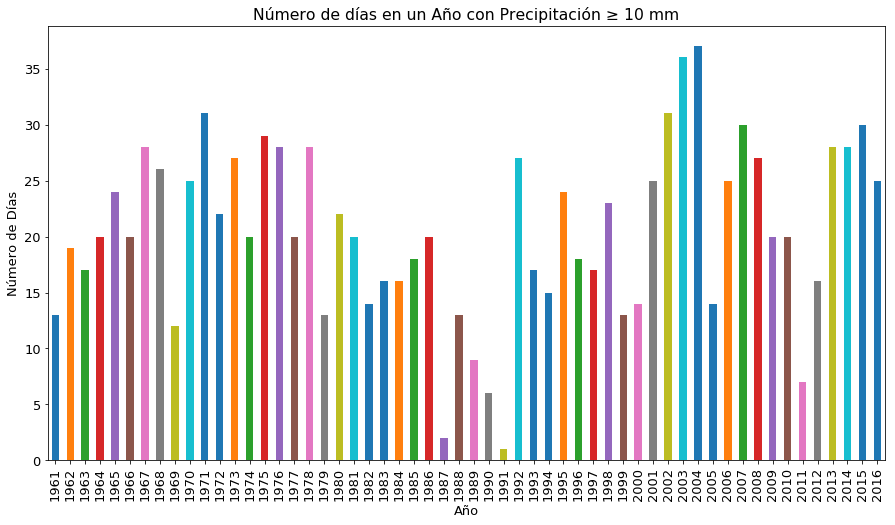

In [77]:
# Número de días en el año con precipitación diaria mayor igual a 10 mm.
df_R10 = df[df.Precip >= 10]

fig = plt.figure(figsize=(15,8))
df_R10['Precip'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'bar', legend = '')
plt.title('Número de días en un Año con Precipitación ≥ 10 mm')
plt.ylabel('Número de Días')
plt.xlabel('Año')

Text(0.5, 0, 'Año')

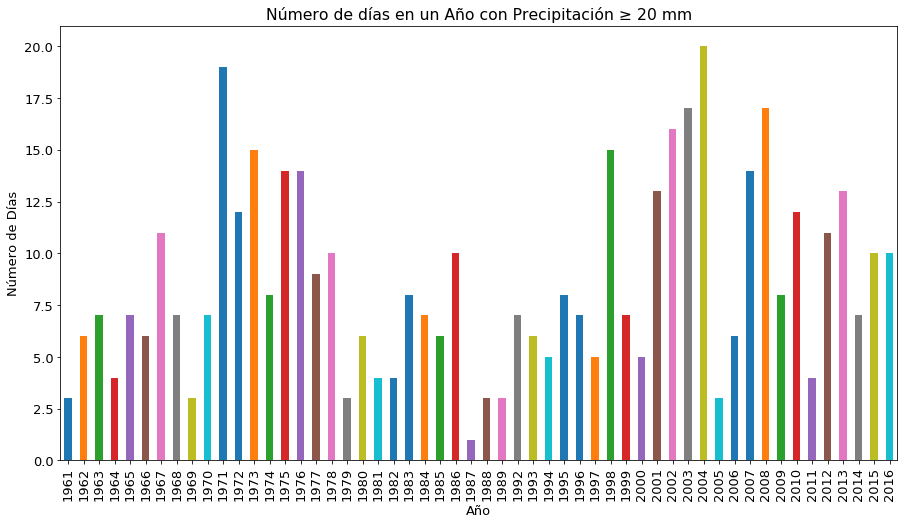

In [78]:
# Número de días en el año con precipitación diaria mayor igual a 20mm.
df_R20 = df[df.Precip >= 20]

fig = plt.figure(figsize=(15,8))
df_R20['Precip'].groupby(df.Fecha.dt.year).agg('count').plot(kind = 'bar', legend = '')
plt.title('Número de días en un Año con Precipitación ≥ 20 mm')
plt.ylabel('Número de Días')
plt.xlabel('Año')

In [7]:
# Número de días consecutivos secos, sin precipitación o precipitación < 1mm.
df_CDD = df[df.Precip < 1]
df_CDD.groupby(df.Fecha).agg('count')

,Fecha,Precip,Evap,Tmax,Tmin
Fecha,,,,,
1961-01-01,1,1,1,1,1
1961-01-02,1,1,1,1,1
1961-01-03,1,1,1,1,1
1961-01-04,1,1,1,1,1
1961-01-05,1,1,1,1,1
1961-01-06,1,1,1,1,1
1961-01-07,1,1,1,1,1
1961-01-08,1,1,1,1,1
1961-01-09,1,1,1,1,1
